In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from lightgbm import LGBMClassifier

In [2]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score, fbeta_score
from sklearn.metrics import log_loss
from sklearn import metrics

from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTENC

from IPython.display import Image  
from six import StringIO  
import graphviz
import pydot 

In [3]:
ccdata = pd.read_csv('BankChurners.csv')
ccdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
#run once
ccdata.drop("CLIENTNUM",axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

In [5]:
#run once
ccdata['Gender'].replace({'M':1,'F':0},inplace=True)
ccdata["Attrition_Flag"].replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)

In [6]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
#run once
#drop_first = True to avoid structural multicollinearity
ccdata2 = pd.get_dummies(data=ccdata,columns=['Education_Level','Marital_Status',"Income_Category",'Card_Category'],drop_first=True)
ccdata2.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [8]:
ccdata2.drop(['Avg_Open_To_Buy','Customer_Age','Total_Trans_Ct','Months_on_book','Total_Amt_Chng_Q4_Q1'],axis=1,inplace=True)

In [9]:
ccdata2

,Attrition_Flag,Gender,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,1,3,5,1,3,12691.0,777,1144,1.625,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5,6,1,2,8256.0,864,1291,3.714,...,1,0,0,0,0,1,0,0,0,0
2,0,1,3,4,1,0,3418.0,0,1887,2.333,...,0,0,0,0,1,0,0,0,0,0
3,0,0,4,3,4,1,3313.0,2517,1171,2.333,...,0,1,0,0,0,1,0,0,0,0
4,0,1,3,5,1,0,4716.0,0,816,2.500,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1,2,3,2,3,4003.0,1851,15476,0.857,...,1,0,1,0,0,0,0,0,0,0
10123,1,1,2,4,2,3,4277.0,2186,8764,0.683,...,0,0,1,0,0,0,0,0,0,0
10124,1,0,1,5,3,4,5409.0,0,10291,0.818,...,0,0,0,0,0,1,0,0,0,0
10125,1,1,2,4,3,3,5281.0,0,8395,0.722,...,0,1,1,0,0,0,0,0,0,0


In [10]:
def lgbm_results(X_train,X_test,y_train,y_test):
    print('LGBM Model Results\n')
    #post-optimization params
    model = LGBMClassifier(application='binary',max_depth=5, min_data_in_leaf=60, n_estimators=150, num_leaves=100)
    model.fit(X_train,y_train)
    lgbmpreds = model.predict(X_test)
    print(classification_report(y_test,lgbmpreds))
    print('Confusion Matrix\n',confusion_matrix(y_test,lgbmpreds))
    plot_confusion_matrix(model,X_test,y_test,normalize='true',cmap='bwr')
    plt.show()
    print('Accuracy Score',round(accuracy_score(y_test,lgbmpreds)*100,2),'%')
    print('Recall:',round(recall_score(y_test,lgbmpreds)*100,2),'%')
    print('Precision:',round(precision_score(y_test,lgbmpreds)*100,2),'%')
    print('F2 Score:',round(fbeta_score(y_test, lgbmpreds, beta=2.0)*100,2),'%\n')
    print('The Training Accuracy is :',model.score(X_train,y_train))
    print('The Testing Accuracy is :', model.score(X_test,y_test))
    #running log loss on training data
    pred_proba = model.predict_proba(X_train)
    print('The log loss on training data is ',log_loss(y_train,pred_proba))
    #running log loss on testing data
    pred_proba_t = model.predict_proba(X_test)
    print('The log loss on testing data is ',log_loss(y_test,pred_proba_t),'\n')    
    df = pd.DataFrame({"Feature_names":X_train.columns,'Importances':model.feature_importances_})
    df1 = df.sort_values(by='Importances',ascending=False).reset_index()
    print(df1,'\n')
    df2 = df1[:10].sort_values(by='Importances',ascending=True)
    plt.figure(figsize=(6,6))
    plt.barh(df2['Feature_names'],df2['Importances'])
    plt.show()
    plt.tight_layout()
    print('\n')

In [11]:
X = ccdata2.drop("Attrition_Flag",axis=1)
y = ccdata2['Attrition_Flag']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

## Hyperparameter Optimization

In [14]:
r_lgbm = LGBMClassifier(application='binary')

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
np.arange(5,30,5)**2

array([ 25, 100, 225, 400, 625], dtype=int32)

In [17]:
lgbmparam_grid = [
    {
        'n_estimators':np.arange(100,200,50),
        'boosting_type':['gbdt','rf','dart','goss'],
        'max_depth':np.arange(5,30,5),
        'min_data_in_leaf':np.arange(30,100,10),
        'num_leaves': np.arange(5,30,5)**2
    }
]

In [18]:
clf = GridSearchCV(r_lgbm, param_grid = lgbmparam_grid, cv = 5, verbose=True, n_jobs = -1)

In [19]:
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.94088526 0.9410266  0.9410266  ... 0.93679459 0.93679459 0.93679459]
  category=UserWarning


In [20]:
rawresults = pd.DataFrame(clf.cv_results_)
#rawresults

In [23]:
#FIT THE OPTIMAL PARAMETERS INTO THE USER DEFINED FUNCTION THAT GENERATES THE MODEL RESULTS
best_clf.best_estimator_

LGBMClassifier(application='binary', max_depth=5, min_data_in_leaf=60,
               n_estimators=150, num_leaves=100)

In [24]:
best_clf.best_score_

0.9445538907463572

## Preliminary Testing (Pre-feature Selection)

LGBM Model Results

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2551
           1       0.88      0.82      0.85       488

    accuracy                           0.95      3039
   macro avg       0.92      0.90      0.91      3039
weighted avg       0.95      0.95      0.95      3039

Confusion Matrix
 [[2498   53]
 [  87  401]]


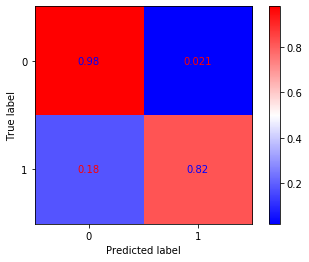

Accuracy Score 95.39 %
Recall: 82.17 %
Precision: 88.33 %
F2 Score: 83.33 %

The Training Accuracy is : 0.975028216704289
The Testing Accuracy is : 0.953932214544258
The log loss on training data is  0.0775421512999915
The log loss on testing data is  0.11951105973976554 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt          653
1       8             Total_Ct_Chng_Q4_Q1          368
2       5                    Credit_Limit          301
3       6             Total_Revolving_Bal          280
4       2        Total_Relationship_Count          192
5       4           Contacts_Count_12_mon          145
6       9           Avg_Utilization_Ratio          139
7       3          Months_Inactive_12_mon          126
8       1                 Dependent_count          101
9      16          Marital_Status_Married           45
10      0                          Gender           44
11     13   Education_Level_Post-Graduate           20
12     17  

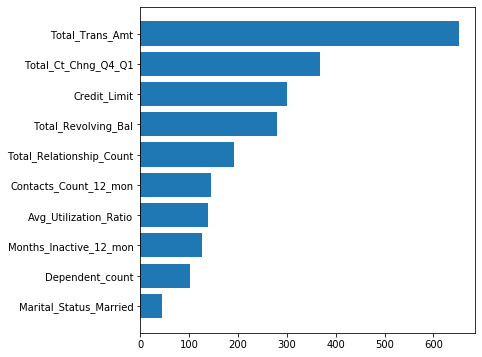

<Figure size 432x288 with 0 Axes>

In [14]:
#post-optimization results
lgbm_results(X_train,X_test,y_train,y_test)

In [15]:
#SMOTENC uses k-nearest neighbour algo to create synthetic samples 
#"Note - SMOTENC takes into consideration categorical and continuous variables"
from imblearn.over_sampling import SMOTE

#X= ccdata2.drop('Attrition_Flag',axis='columns')
#y= ccdata2['Attrition_Flag']
smote = SMOTE(sampling_strategy='minority') 
#samplingstrat specifies whether to use the minority or majority value for under/over-sampling
X_sm, y_sm = smote.fit_resample(X_train,y_train)

y_sm.value_counts()
#generate train test split first then do resampling only on training set

1    5949
0    5949
Name: Attrition_Flag, dtype: int64

LGBM Model Results

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2551
           1       0.81      0.84      0.83       488

    accuracy                           0.94      3039
   macro avg       0.89      0.90      0.90      3039
weighted avg       0.94      0.94      0.94      3039

Confusion Matrix
 [[2457   94]
 [  78  410]]


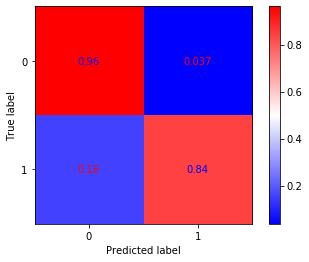

Accuracy Score 94.34 %
Recall: 84.02 %
Precision: 81.35 %
F2 Score: 83.47 %

The Training Accuracy is : 0.9790721129601614
The Testing Accuracy is : 0.943402435011517
The log loss on training data is  0.06996210795089682
The log loss on testing data is  0.1434355010527753 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt          774
1       8             Total_Ct_Chng_Q4_Q1          377
2       5                    Credit_Limit          339
3       6             Total_Revolving_Bal          306
4       2        Total_Relationship_Count          239
5       3          Months_Inactive_12_mon          124
6       4           Contacts_Count_12_mon          116
7       9           Avg_Utilization_Ratio          102
8       1                 Dependent_count           92
9       0                          Gender           68
10     16          Marital_Status_Married           53
11     11        Education_Level_Graduate           50
12     22 

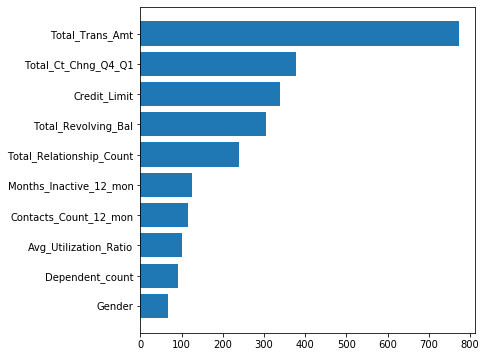

<Figure size 432x288 with 0 Axes>

In [16]:
lgbm_results(X_sm,X_test,y_sm,y_test)

In [17]:
##### With Pipeline Step resampling #####
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
X_train3, y_train3 = pipeline.fit_resample(X_train,y_train)
y_train3.value_counts()

0    3965
1    2379
Name: Attrition_Flag, dtype: int64

LGBM Model Results

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2551
           1       0.79      0.88      0.84       488

    accuracy                           0.94      3039
   macro avg       0.89      0.92      0.90      3039
weighted avg       0.95      0.94      0.95      3039

Confusion Matrix
 [[2439  112]
 [  57  431]]


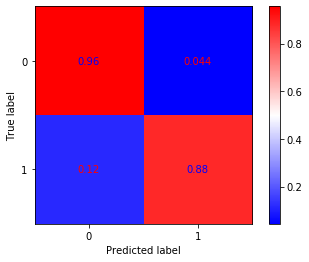

Accuracy Score 94.44 %
Recall: 88.32 %
Precision: 79.37 %
F2 Score: 86.37 %

The Training Accuracy is : 0.9771437578814628
The Testing Accuracy is : 0.9443896018427114
The log loss on training data is  0.0898345322375898
The log loss on testing data is  0.14587179353266475 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt          645
1       6             Total_Revolving_Bal          339
2       8             Total_Ct_Chng_Q4_Q1          334
3       5                    Credit_Limit          281
4       2        Total_Relationship_Count          180
5       9           Avg_Utilization_Ratio          159
6       4           Contacts_Count_12_mon          134
7       1                 Dependent_count          110
8       3          Months_Inactive_12_mon           86
9       0                          Gender           61
10     16          Marital_Status_Married           44
11     17           Marital_Status_Single           33
12     22

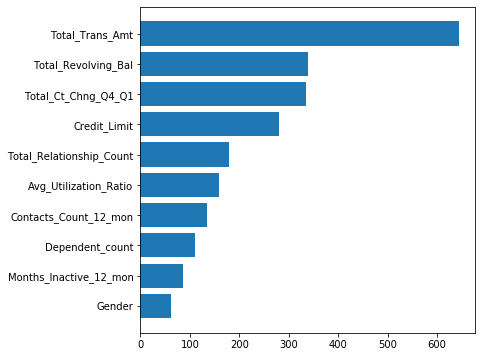

<Figure size 432x288 with 0 Axes>

In [18]:
lgbm_results(X_train3,X_test,y_train3,y_test)

## Post-feature selection

In [19]:
#Feature selection
X_train2 = X_train.drop(['Card_Category_Silver','Card_Category_Gold','Card_Category_Platinum','Education_Level_Uneducated','Income_Category_$60K - $80K','Education_Level_Graduate','Education_Level_Doctorate','Education_Level_High School','Income_Category_Less than $40K','Marital_Status_Unknown','Education_Level_Unknown'],axis=1)
X_test2 = X_test.drop(['Card_Category_Silver','Card_Category_Gold','Card_Category_Platinum','Education_Level_Uneducated','Income_Category_$60K - $80K','Education_Level_Graduate','Education_Level_Doctorate','Education_Level_High School','Income_Category_Less than $40K','Marital_Status_Unknown','Education_Level_Unknown'],axis=1)

LGBM Model Results

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2551
           1       0.89      0.83      0.86       488

    accuracy                           0.96      3039
   macro avg       0.93      0.90      0.91      3039
weighted avg       0.95      0.96      0.95      3039

Confusion Matrix
 [[2499   52]
 [  84  404]]


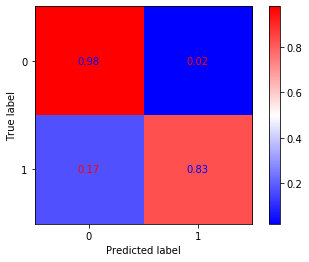

Accuracy Score 95.52 %
Recall: 82.79 %
Precision: 88.6 %
F2 Score: 83.89 %

The Training Accuracy is : 0.975028216704289
The Testing Accuracy is : 0.9552484369858506
The log loss on training data is  0.07635486840385951
The log loss on testing data is  0.11986905804202483 

    index                  Feature_names  Importances
0       7                Total_Trans_Amt          664
1       8            Total_Ct_Chng_Q4_Q1          384
2       5                   Credit_Limit          320
3       6            Total_Revolving_Bal          316
4       2       Total_Relationship_Count          189
5       4          Contacts_Count_12_mon          154
6       9          Avg_Utilization_Ratio          145
7       3         Months_Inactive_12_mon          130
8       1                Dependent_count          121
9      11         Marital_Status_Married           42
10      0                         Gender           39
11     12          Marital_Status_Single           24
12     10  Education_Le

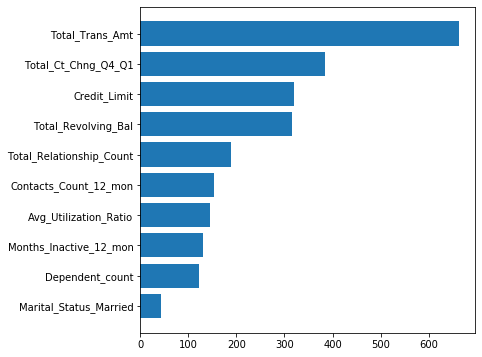

<Figure size 432x288 with 0 Axes>

In [20]:
#non-resampled results
lgbm_results(X_train2,X_test2,y_train,y_test)

In [21]:
#SMOTENC uses k-nearest neighbour algo to create synthetic samples 
#"Note - SMOTENC takes into consideration categorical and continuous variables"
from imblearn.over_sampling import SMOTE

#X= ccdata2.drop('Attrition_Flag',axis='columns')
#y= ccdata2['Attrition_Flag']
smote = SMOTE(sampling_strategy='minority') 
#samplingstrat specifies whether to use the minority or majority value for under/over-sampling
X_sm2, y_sm2 = smote.fit_resample(X_train2,y_train)

y_sm2.value_counts()
#generate train test split first then do resampling only on training set

1    5949
0    5949
Name: Attrition_Flag, dtype: int64

LGBM Model Results

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2551
           1       0.75      0.88      0.81       488

    accuracy                           0.93      3039
   macro avg       0.86      0.91      0.88      3039
weighted avg       0.94      0.93      0.94      3039

Confusion Matrix
 [[2409  142]
 [  61  427]]


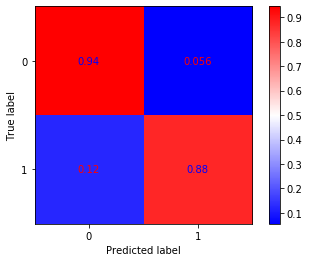

Accuracy Score 93.32 %
Recall: 87.5 %
Precision: 75.04 %
F2 Score: 84.69 %

The Training Accuracy is : 0.9715918641788536
The Testing Accuracy is : 0.933201711089174
The log loss on training data is  0.0895766849812143
The log loss on testing data is  0.16337733613929745 

    index                  Feature_names  Importances
0       7                Total_Trans_Amt          786
1       8            Total_Ct_Chng_Q4_Q1          409
2       5                   Credit_Limit          403
3       6            Total_Revolving_Bal          326
4       2       Total_Relationship_Count          293
5       9          Avg_Utilization_Ratio          161
6       1                Dependent_count          130
7       4          Contacts_Count_12_mon          119
8       3         Months_Inactive_12_mon          115
9      11         Marital_Status_Married           83
10      0                         Gender           63
11     12          Marital_Status_Single           56
12     15        Income_

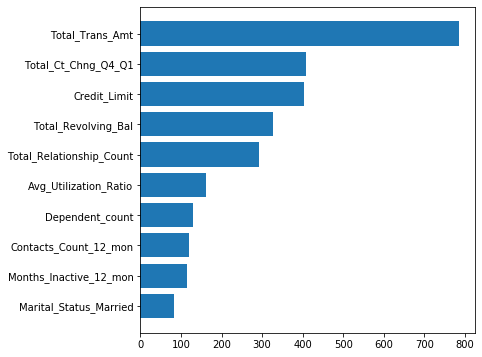

<Figure size 432x288 with 0 Axes>

In [22]:
lgbm_results(X_sm2,X_test2,y_sm2,y_test)

In [23]:
##### With Pipeline Step resampling #####
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
X_train4, y_train4 = pipeline.fit_resample(X_train2,y_train)
y_train4.value_counts()

0    3965
1    2379
Name: Attrition_Flag, dtype: int64

LGBM Model Results

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2551
           1       0.75      0.88      0.81       488

    accuracy                           0.93      3039
   macro avg       0.86      0.91      0.88      3039
weighted avg       0.94      0.93      0.94      3039

Confusion Matrix
 [[2407  144]
 [  59  429]]


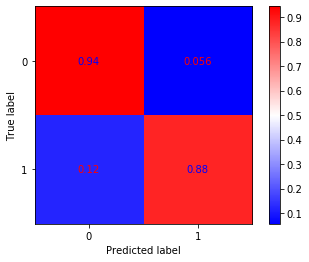

Accuracy Score 93.32 %
Recall: 87.91 %
Precision: 74.87 %
F2 Score: 84.95 %

The Training Accuracy is : 0.9689470365699874
The Testing Accuracy is : 0.933201711089174
The log loss on training data is  0.10274697618201764
The log loss on testing data is  0.1611425684125045 

    index                  Feature_names  Importances
0       7                Total_Trans_Amt          621
1       8            Total_Ct_Chng_Q4_Q1          328
2       6            Total_Revolving_Bal          327
3       5                   Credit_Limit          324
4       2       Total_Relationship_Count          194
5       9          Avg_Utilization_Ratio          179
6       4          Contacts_Count_12_mon          116
7       1                Dependent_count          115
8       3         Months_Inactive_12_mon          107
9      12          Marital_Status_Single           63
10     11         Marital_Status_Married           61
11      0                         Gender           49
12     15        Income

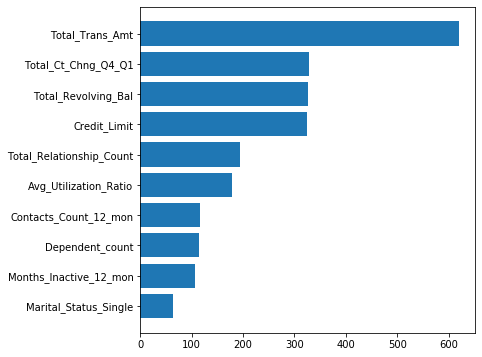

<Figure size 432x288 with 0 Axes>

In [24]:
lgbm_results(X_train4,X_test2,y_train4,y_test)

## Class weight rebalancing (Pre-feature selection)

In [25]:
def weighted_lgbm_results(X_train,X_test,y_train,y_test):
    print('LGBM Model Results\n')
    #post-optimization params
    model = LGBMClassifier(application='binary',max_depth=5, min_data_in_leaf=60, 
                           n_estimators=150, num_leaves=100, is_unbalance=True)
    model.fit(X_train,y_train)
    lgbmpreds = model.predict(X_test)
    print(classification_report(y_test,lgbmpreds))
    print('Confusion Matrix\n',confusion_matrix(y_test,lgbmpreds))
    plot_confusion_matrix(model,X_test,y_test,normalize='true',cmap='bwr')
    plt.show()
    print('Accuracy Score',round(accuracy_score(y_test,lgbmpreds)*100,2),'%')
    print('Recall:',round(recall_score(y_test,lgbmpreds)*100,2),'%')
    print('Precision:',round(precision_score(y_test,lgbmpreds)*100,2),'%')
    print('F2 Score:',round(fbeta_score(y_test, lgbmpreds, beta=2.0)*100,2),'%\n')
    print('The Training Accuracy is :',model.score(X_train,y_train))
    print('The Testing Accuracy is :', model.score(X_test,y_test))
    #running log loss on training data
    pred_proba = model.predict_proba(X_train)
    print('The log loss on training data is ',log_loss(y_train,pred_proba))
    #running log loss on testing data
    pred_proba_t = model.predict_proba(X_test)
    print('The log loss on testing data is ',log_loss(y_test,pred_proba_t),'\n')    
    df = pd.DataFrame({"Feature_names":X_train.columns,'Importances':model.feature_importances_})
    df1 = df.sort_values(by='Importances',ascending=False).reset_index()
    print(df1,'\n')
    df2 = df1[:10].sort_values(by='Importances',ascending=True)
    plt.figure(figsize=(6,6))
    plt.barh(df2['Feature_names'],df2['Importances'])
    plt.title('LightGBM Features (avg over folds)')
    plt.show()
    plt.tight_layout()
    print('\n')
    
    return pred_proba_t,X_train,X_test,model.fit(X_train,y_train)

    

LGBM Model Results

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2551
           1       0.75      0.92      0.82       488

    accuracy                           0.94      3039
   macro avg       0.87      0.93      0.89      3039
weighted avg       0.95      0.94      0.94      3039

Confusion Matrix
 [[2399  152]
 [  39  449]]


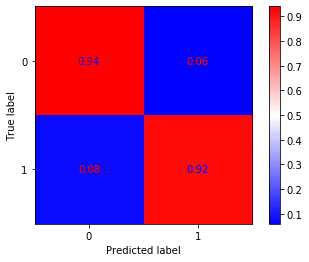

Accuracy Score 93.72 %
Recall: 92.01 %
Precision: 74.71 %
F2 Score: 87.94 %

The Training Accuracy is : 0.9566873589164786
The Testing Accuracy is : 0.937150378413952
The log loss on training data is  0.11477465577052459
The log loss on testing data is  0.1582900827159754 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt          675
1       8             Total_Ct_Chng_Q4_Q1          358
2       5                    Credit_Limit          300
3       6             Total_Revolving_Bal          264
4       2        Total_Relationship_Count          212
5       4           Contacts_Count_12_mon          143
6       3          Months_Inactive_12_mon          118
7       1                 Dependent_count          108
8       9           Avg_Utilization_Ratio          107
9       0                          Gender           42
10     16          Marital_Status_Married           30
11     13   Education_Level_Post-Graduate           22
12     12 

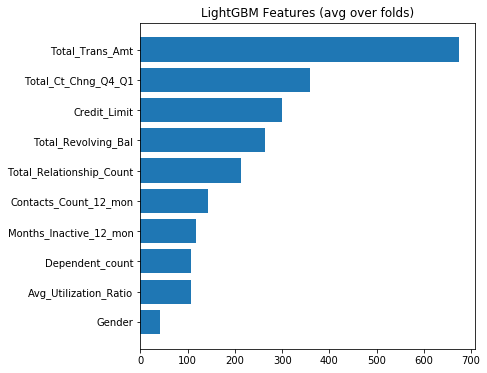



[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


(array([[9.96803770e-01, 3.19623000e-03],
        [1.65417151e-04, 9.99834583e-01],
        [9.21905718e-01, 7.80942823e-02],
        ...,
        [9.81498938e-01, 1.85010624e-02],
        [9.96251155e-01, 3.74884460e-03],
        [9.81631944e-01, 1.83680562e-02]]),
       Gender  Dependent_count  Total_Relationship_Count  \
 4124       0                1                         6   
 4686       1                0                         3   
 1276       0                0                         6   
 6119       0                0                         3   
 2253       1                3                         6   
 ...      ...              ...                       ...   
 4581       0                2                         5   
 9338       1                0                         2   
 9950       1                5                         4   
 1784       1                0                         6   
 4752       0                4                         4   
 
       Mont

<Figure size 432x288 with 0 Axes>

In [26]:
weighted_lgbm_results(X_train,X_test,y_train,y_test)

LGBM Model Results

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2551
           1       0.81      0.84      0.83       488

    accuracy                           0.94      3039
   macro avg       0.89      0.90      0.90      3039
weighted avg       0.94      0.94      0.94      3039

Confusion Matrix
 [[2457   94]
 [  78  410]]


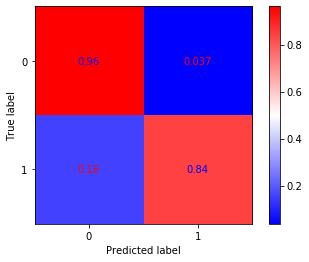

Accuracy Score 94.34 %
Recall: 84.02 %
Precision: 81.35 %
F2 Score: 83.47 %

The Training Accuracy is : 0.9790721129601614
The Testing Accuracy is : 0.943402435011517
The log loss on training data is  0.06996210795089682
The log loss on testing data is  0.1434355010527753 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt          774
1       8             Total_Ct_Chng_Q4_Q1          377
2       5                    Credit_Limit          339
3       6             Total_Revolving_Bal          306
4       2        Total_Relationship_Count          239
5       3          Months_Inactive_12_mon          124
6       4           Contacts_Count_12_mon          116
7       9           Avg_Utilization_Ratio          102
8       1                 Dependent_count           92
9       0                          Gender           68
10     16          Marital_Status_Married           53
11     11        Education_Level_Graduate           50
12     22 

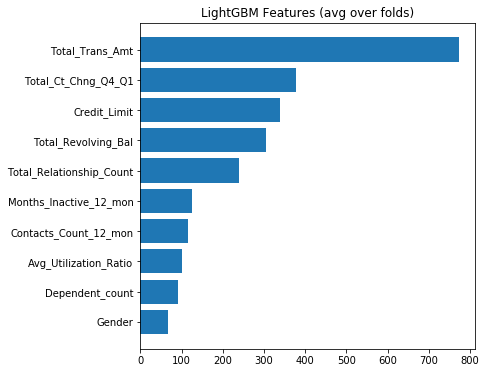



[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


(array([[9.98644719e-01, 1.35528131e-03],
        [1.81058318e-04, 9.99818942e-01],
        [7.92169853e-01, 2.07830147e-01],
        ...,
        [9.77008268e-01, 2.29917323e-02],
        [9.98916613e-01, 1.08338697e-03],
        [9.80663764e-01, 1.93362361e-02]]),
        Gender  Dependent_count  Total_Relationship_Count  \
 0           0                1                         6   
 1           1                0                         3   
 2           0                0                         6   
 3           0                0                         3   
 4           1                3                         6   
 ...       ...              ...                       ...   
 11893       1                4                         2   
 11894       0                2                         2   
 11895       0                3                         2   
 11896       0                1                         3   
 11897       0                4                         3   
 

<Figure size 432x288 with 0 Axes>

In [27]:
weighted_lgbm_results(X_sm,X_test,y_sm,y_test)

LGBM Model Results

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2551
           1       0.73      0.90      0.81       488

    accuracy                           0.93      3039
   macro avg       0.86      0.92      0.88      3039
weighted avg       0.94      0.93      0.93      3039

Confusion Matrix
 [[2391  160]
 [  49  439]]


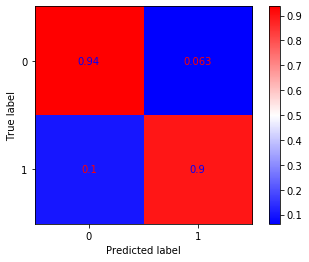

Accuracy Score 93.12 %
Recall: 89.96 %
Precision: 73.29 %
F2 Score: 86.04 %

The Training Accuracy is : 0.9736759142496847
The Testing Accuracy is : 0.9312273774267851
The log loss on training data is  0.094647365762275
The log loss on testing data is  0.16388206930436397 

    index                   Feature_names  Importances
0       7                 Total_Trans_Amt          662
1       8             Total_Ct_Chng_Q4_Q1          326
2       6             Total_Revolving_Bal          323
3       5                    Credit_Limit          299
4       2        Total_Relationship_Count          182
5       9           Avg_Utilization_Ratio          165
6       4           Contacts_Count_12_mon          125
7       1                 Dependent_count          101
8       3          Months_Inactive_12_mon           92
9       0                          Gender           51
10     16          Marital_Status_Married           39
11     22  Income_Category_Less than $40K           31
12     11 

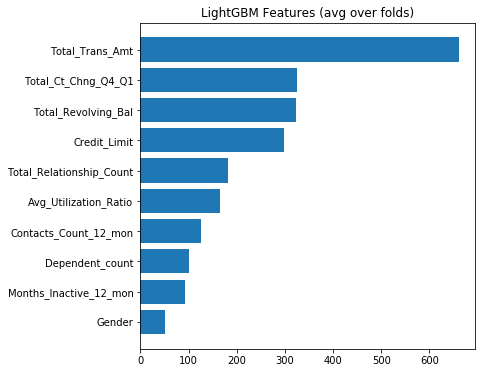



[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


(array([[9.94592416e-01, 5.40758385e-03],
        [7.37909980e-04, 9.99262090e-01],
        [8.84578702e-01, 1.15421298e-01],
        ...,
        [9.78358291e-01, 2.16417088e-02],
        [9.96883938e-01, 3.11606214e-03],
        [9.66757764e-01, 3.32422364e-02]]),
       Gender  Dependent_count  Total_Relationship_Count  \
 0          0                4                         4   
 1          0                1                         6   
 2          1                4                         5   
 3          0                4                         3   
 4          0                1                         6   
 ...      ...              ...                       ...   
 6339       0                2                         2   
 6340       0                2                         1   
 6341       1                2                         5   
 6342       1                3                         3   
 6343       0                3                         3   
 
       Mont

<Figure size 432x288 with 0 Axes>

In [28]:
weighted_lgbm_results(X_train3,X_test,y_train3,y_test)

## class weight rebalancing (Post-feature selection)

LGBM Model Results

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2551
           1       0.74      0.93      0.82       488

    accuracy                           0.94      3039
   macro avg       0.86      0.93      0.89      3039
weighted avg       0.95      0.94      0.94      3039

Confusion Matrix
 [[2392  159]
 [  35  453]]


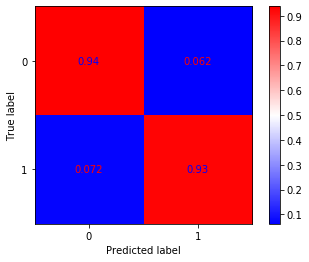

Accuracy Score 93.62 %
Recall: 92.83 %
Precision: 74.02 %
F2 Score: 88.34 %

The Training Accuracy is : 0.9575338600451467
The Testing Accuracy is : 0.9361632115827575
The log loss on training data is  0.11403621169706898
The log loss on testing data is  0.15665227210997346 

    index                  Feature_names  Importances
0       7                Total_Trans_Amt          672
1       8            Total_Ct_Chng_Q4_Q1          372
2       6            Total_Revolving_Bal          307
3       5                   Credit_Limit          305
4       2       Total_Relationship_Count          211
5       4          Contacts_Count_12_mon          147
6       9          Avg_Utilization_Ratio          127
7       3         Months_Inactive_12_mon          120
8       1                Dependent_count          118
9       0                         Gender           49
10     11         Marital_Status_Married           40
11     10  Education_Level_Post-Graduate           21
12     14   Income_Ca

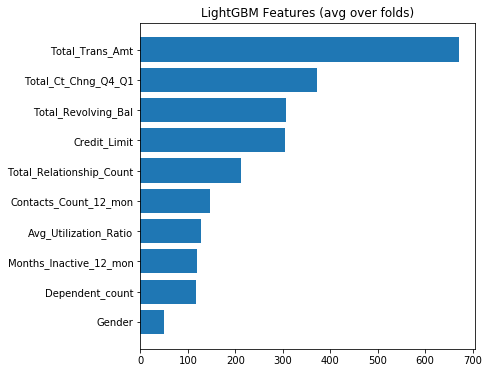



[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


(array([[9.97284065e-01, 2.71593505e-03],
        [2.45423517e-04, 9.99754576e-01],
        [9.49841744e-01, 5.01582555e-02],
        ...,
        [9.75982550e-01, 2.40174504e-02],
        [9.96341887e-01, 3.65811327e-03],
        [9.88948225e-01, 1.10517755e-02]]),
       Gender  Dependent_count  Total_Relationship_Count  \
 4124       0                1                         6   
 4686       1                0                         3   
 1276       0                0                         6   
 6119       0                0                         3   
 2253       1                3                         6   
 ...      ...              ...                       ...   
 4581       0                2                         5   
 9338       1                0                         2   
 9950       1                5                         4   
 1784       1                0                         6   
 4752       0                4                         4   
 
       Mont

<Figure size 432x288 with 0 Axes>

In [29]:
weighted_lgbm_results(X_train2,X_test2,y_train,y_test)

LGBM Model Results

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2551
           1       0.75      0.88      0.81       488

    accuracy                           0.93      3039
   macro avg       0.86      0.91      0.88      3039
weighted avg       0.94      0.93      0.94      3039

Confusion Matrix
 [[2409  142]
 [  61  427]]


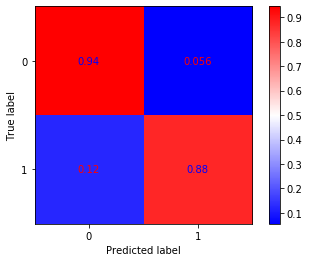

Accuracy Score 93.32 %
Recall: 87.5 %
Precision: 75.04 %
F2 Score: 84.69 %

The Training Accuracy is : 0.9715918641788536
The Testing Accuracy is : 0.933201711089174
The log loss on training data is  0.0895766849812143
The log loss on testing data is  0.16337733613929745 

    index                  Feature_names  Importances
0       7                Total_Trans_Amt          786
1       8            Total_Ct_Chng_Q4_Q1          409
2       5                   Credit_Limit          403
3       6            Total_Revolving_Bal          326
4       2       Total_Relationship_Count          293
5       9          Avg_Utilization_Ratio          161
6       1                Dependent_count          130
7       4          Contacts_Count_12_mon          119
8       3         Months_Inactive_12_mon          115
9      11         Marital_Status_Married           83
10      0                         Gender           63
11     12          Marital_Status_Single           56
12     15        Income_

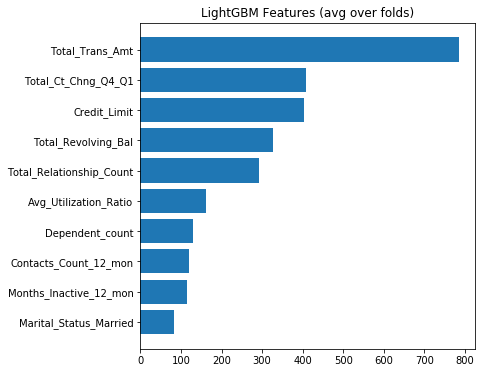



[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


(array([[9.96323054e-01, 3.67694585e-03],
        [1.30989303e-04, 9.99869011e-01],
        [9.08254393e-01, 9.17456067e-02],
        ...,
        [9.93978362e-01, 6.02163823e-03],
        [9.98280568e-01, 1.71943174e-03],
        [9.88914369e-01, 1.10856307e-02]]),
        Gender  Dependent_count  Total_Relationship_Count  \
 0           0                1                         6   
 1           1                0                         3   
 2           0                0                         6   
 3           0                0                         3   
 4           1                3                         6   
 ...       ...              ...                       ...   
 11893       0                3                         3   
 11894       1                2                         2   
 11895       0                2                         2   
 11896       0                1                         1   
 11897       0                4                         5   
 

<Figure size 432x288 with 0 Axes>

In [30]:
weighted_lgbm_results(X_sm2,X_test2,y_sm2,y_test)

LGBM Model Results

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2551
           1       0.70      0.91      0.79       488

    accuracy                           0.92      3039
   macro avg       0.84      0.92      0.87      3039
weighted avg       0.94      0.92      0.93      3039

Confusion Matrix
 [[2362  189]
 [  45  443]]


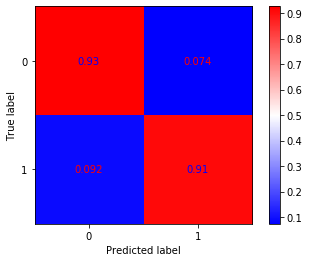

Accuracy Score 92.3 %
Recall: 90.78 %
Precision: 70.09 %
F2 Score: 85.72 %

The Training Accuracy is : 0.9687894073139974
The Testing Accuracy is : 0.9230009871668312
The log loss on training data is  0.10493107887401752
The log loss on testing data is  0.18142618798644666 

    index                  Feature_names  Importances
0       7                Total_Trans_Amt          629
1       8            Total_Ct_Chng_Q4_Q1          347
2       5                   Credit_Limit          338
3       6            Total_Revolving_Bal          335
4       2       Total_Relationship_Count          200
5       9          Avg_Utilization_Ratio          152
6       1                Dependent_count          128
7       4          Contacts_Count_12_mon          121
8       3         Months_Inactive_12_mon          103
9      12          Marital_Status_Single           61
10     11         Marital_Status_Married           59
11      0                         Gender           45
12     15        Incom

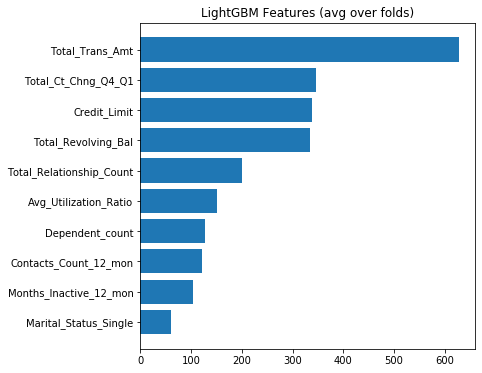



[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


(array([[9.94415778e-01, 5.58422175e-03],
        [1.18603865e-04, 9.99881396e-01],
        [9.29136661e-01, 7.08633386e-02],
        ...,
        [9.71020249e-01, 2.89797505e-02],
        [9.99061933e-01, 9.38067434e-04],
        [9.85567619e-01, 1.44323806e-02]]),
       Gender  Dependent_count  Total_Relationship_Count  \
 0          1                0                         5   
 1          1                4                         2   
 2          1                2                         2   
 3          1                3                         1   
 4          0                3                         3   
 ...      ...              ...                       ...   
 6339       0                3                         2   
 6340       0                3                         4   
 6341       0                3                         5   
 6342       0                3                         4   
 6343       0                0                         3   
 
       Mont

<Figure size 432x288 with 0 Axes>

In [31]:
weighted_lgbm_results(X_train4,X_test2,y_train4,y_test)

## Model Interpretability using LIME

LGBM Model Results

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2551
           1       0.74      0.93      0.82       488

    accuracy                           0.94      3039
   macro avg       0.86      0.93      0.89      3039
weighted avg       0.95      0.94      0.94      3039

Confusion Matrix
 [[2392  159]
 [  35  453]]


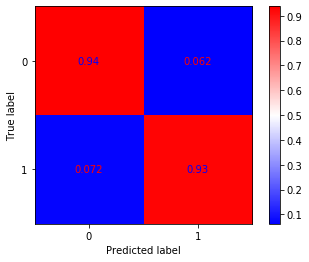

Accuracy Score 93.62 %
Recall: 92.83 %
Precision: 74.02 %
F2 Score: 88.34 %

The Training Accuracy is : 0.9575338600451467
The Testing Accuracy is : 0.9361632115827575
The log loss on training data is  0.11403621169706898
The log loss on testing data is  0.15665227210997346 

    index                  Feature_names  Importances
0       7                Total_Trans_Amt          672
1       8            Total_Ct_Chng_Q4_Q1          372
2       6            Total_Revolving_Bal          307
3       5                   Credit_Limit          305
4       2       Total_Relationship_Count          211
5       4          Contacts_Count_12_mon          147
6       9          Avg_Utilization_Ratio          127
7       3         Months_Inactive_12_mon          120
8       1                Dependent_count          118
9       0                         Gender           49
10     11         Marital_Status_Married           40
11     10  Education_Level_Post-Graduate           21
12     14   Income_Ca

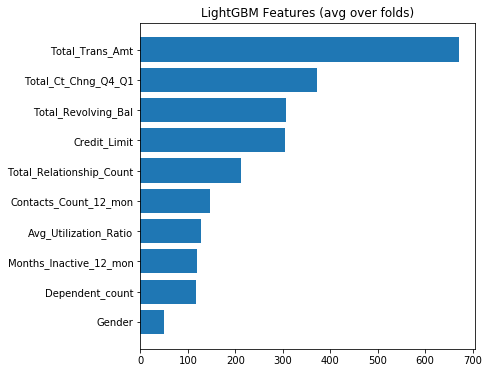



[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


<Figure size 432x288 with 0 Axes>

In [32]:
#chosen model for interpreting
pred_proba_1,xtrain,xtest,lgbmodel = weighted_lgbm_results(X_train2,X_test2,y_train,y_test)

In [33]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(xtrain.values, mode='classification',feature_names=xtrain.columns,
                                 discretize_continuous=True)

In [34]:
pred_proba_1 = pd.DataFrame(pred_proba_1)
xtest = pd.DataFrame(xtest)

In [35]:
xtest = xtest.reset_index().drop('index',axis=1)

In [36]:
ppdset1 = xtest.join(pred_proba_1)
ppdset1 = ppdset1.sort_values(by=[1]).reset_index().drop('index',axis=1)
ppdset1

,Gender,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Post-Graduate,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$80K - $120K,Income_Category_Unknown,0,1
0,0,0,6,1,0,2834.0,1418,1598,0.773,0.500,0,1,0,0,0,0,0.999948,0.000052
1,1,0,6,1,0,2215.0,1915,1270,0.588,0.865,0,1,0,0,0,0,0.999941,0.000059
2,0,4,6,1,3,15987.0,1648,1436,1.250,0.103,0,0,1,0,0,0,0.999941,0.000059
3,0,1,4,1,0,3174.0,1951,1243,0.611,0.615,0,1,0,0,0,0,0.999933,0.000067
4,0,1,6,3,2,2324.0,1576,1272,1.312,0.678,0,1,0,0,0,0,0.999922,0.000078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,0,1,2,3,2,1470.0,458,2383,0.444,0.312,0,0,0,0,0,0,0.000547,0.999453
3035,1,3,2,2,3,1438.3,0,891,0.400,0.000,0,1,0,1,0,0,0.000464,0.999536
3036,0,2,1,3,5,1883.0,400,1954,0.500,0.212,0,0,1,0,0,0,0.000404,0.999596
3037,1,3,2,3,4,3100.0,2517,694,0.200,0.812,0,1,0,0,0,0,0.000285,0.999715


In [42]:
testdata = ppdset1.drop([0,1],axis=1)
testdata

,Gender,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Post-Graduate,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$80K - $120K,Income_Category_Unknown
0,0,0,6,1,0,2834.0,1418,1598,0.773,0.500,0,1,0,0,0,0
1,1,0,6,1,0,2215.0,1915,1270,0.588,0.865,0,1,0,0,0,0
2,0,4,6,1,3,15987.0,1648,1436,1.250,0.103,0,0,1,0,0,0
3,0,1,4,1,0,3174.0,1951,1243,0.611,0.615,0,1,0,0,0,0
4,0,1,6,3,2,2324.0,1576,1272,1.312,0.678,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,0,1,2,3,2,1470.0,458,2383,0.444,0.312,0,0,0,0,0,0
3035,1,3,2,2,3,1438.3,0,891,0.400,0.000,0,1,0,1,0,0
3036,0,2,1,3,5,1883.0,400,1954,0.500,0.212,0,0,1,0,0,0
3037,1,3,2,3,4,3100.0,2517,694,0.200,0.812,0,1,0,0,0,0


In [37]:
from functools import partial

def model_pred_prob(X,model):
    return model.predict_proba(X)

lgbm_pred_proba_1 = partial(model_pred_prob,model=lgbmodel)

In [38]:
lgbm_pred_proba_1

functools.partial(<function model_pred_prob at 0x0000021EAF7538B8>, model=LGBMClassifier(application='binary', is_unbalance=True, max_depth=5,
               min_data_in_leaf=60, n_estimators=150, num_leaves=100))

### Targeting specific subset of customer

In [39]:
ppdset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         3039 non-null   int64  
 1   Dependent_count                3039 non-null   int64  
 2   Total_Relationship_Count       3039 non-null   int64  
 3   Months_Inactive_12_mon         3039 non-null   int64  
 4   Contacts_Count_12_mon          3039 non-null   int64  
 5   Credit_Limit                   3039 non-null   float64
 6   Total_Revolving_Bal            3039 non-null   int64  
 7   Total_Trans_Amt                3039 non-null   int64  
 8   Total_Ct_Chng_Q4_Q1            3039 non-null   float64
 9   Avg_Utilization_Ratio          3039 non-null   float64
 10  Education_Level_Post-Graduate  3039 non-null   uint8  
 11  Marital_Status_Married         3039 non-null   uint8  
 12  Marital_Status_Single          3039 non-null   u

In [40]:
ppdset1[(ppdset1['Total_Trans_Amt']>9000) & (ppdset1[1]>0.5)][['Total_Trans_Amt',1]]

,Total_Trans_Amt,1
2506,9102,0.650833
2629,9451,0.856316
2644,9226,0.872151
2678,9105,0.906145
2679,12025,0.906347
2692,9658,0.919582
2697,9195,0.921446
2699,9138,0.923105
2770,9274,0.959063
2807,9338,0.971224


In [43]:
#Using customer at index 2679 with the highest total transaction amount

obs_5 = testdata.iloc[[2679],:]
print('model prediction:', lgbmodel.predict(obs_5))
ppdset1.iloc[2679,]

model prediction: [1]


Gender                               1.000000
Dependent_count                      2.000000
Total_Relationship_Count             1.000000
Months_Inactive_12_mon               3.000000
Contacts_Count_12_mon                3.000000
Credit_Limit                     29038.000000
Total_Revolving_Bal               2295.000000
Total_Trans_Amt                  12025.000000
Total_Ct_Chng_Q4_Q1                  0.807000
Avg_Utilization_Ratio                0.079000
Education_Level_Post-Graduate        1.000000
Marital_Status_Married               0.000000
Marital_Status_Single                1.000000
Income_Category_$40K - $60K          0.000000
Income_Category_$80K - $120K         0.000000
Income_Category_Unknown              0.000000
0                                    0.093653
1                                    0.906347
Name: 2679, dtype: float64

In [44]:
explanation5 = explainer.explain_instance(obs_5.values[0], lgbm_pred_proba_1)

In [45]:
explanation5.show_in_notebook(show_table=True, show_all=False)
print(explanation5.score)

0.082500527439345
